## Prueba #0501

### "Regresión Logísitica y algoritmo de Gradiente Descendente"

#### Responda las siguientes preguntas proporcionando código Python:
#### Objetivos:
- Codifique una clase de regresión logística utilizando solo la biblioteca NumPy.
- Implementar en Python la función Sigmoid.
- Implementar en Python el Gradiente de la probabilidad logarítmica.
- Implementar en Python el algoritmo de gradiente descendente.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#### Leer los datos:

In [2]:
# Cargar los datos
data = load_breast_cancer()
# Variables explicativas
X = data['data']
# Volver a etquetar para que 0 = 'benign' y 1 = malignant.
Y = 1 - data['target']

In [3]:
# Dividir el conjunto de datos en entrenamiento y prueba.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=1234)

1). Defina las funciones 'sigmoide' y 'gradiente' para producir el resultado que se muestra a continuación:

In [69]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x)) #Devuelve un número entre 0 - 1 

def gradient(X, Y, beta):
    print(X.shape)
    print(beta.shape)
    conjunto = np.dot(X,beta.T)
    print(conjunto.shape)
    ds = -Y*(1-sigmoid(conjunto*Y))*X #np.dot hace el producto de dos arrays
    return ds.sum(axis = 0)


2). Defina la clase 'LogisticRegression' para producir el resultado que se muestra a continuación:

In [70]:
X_train.shape
np.concatenate((np.ones((X_train.shape[0],1)),X_train),axis=1).shape

(341, 31)

In [71]:
class LogisticRegression:
    def __init__(self, learn_rate):
        self.learn_rate = learn_rate
        
    def train(self, input_X, input_Y, n_epochs):
        X = np.concatenate((np.ones((input_X.shape[0],1)),input_X),axis=1) #Añadimos la columna de unos para beta0
        Y = (2*input_Y - 1)
        dimension =  input_X.shape[0]
        beta = np.full((dimension,31), 0.01) #La incializamos antes de rellenar
        for values in range(n_epochs):
            beta = beta - self.learn_rate * gradient(X,Y,beta)
        return beta
    
    
    def query(self, input_X, prob=True, cutoff=0.5):
        dimension =  input_X.shape[0]
        w = np.full((dimension,1), 0.01) #Representa el peso
        y_head = sigmoid(np.dot(w.T,input_X)+self.beta)
        Y_prediction = np.zeros((1,input_X.shape[1]))
        
        # si z es mayor que 0.5, nuestra predicción es uno (y_head = 1),
        # si z es menor que 0.5, nuestra predicción es cero (y_head = 0), 
        for i in range(y_head.shape[1]):
            if y_head[0,i]<= 0.5:
                Y_prediction[0,i] = 0
            else:
                Y_prediction[0,i] = 1

        return Y_prediction
        

#### Ejecutar:

In [72]:
# Hiperparámetro para el regresor.
learning_rate = 0.001

In [74]:
# Entrenar y predecir.
LR = LogisticRegression(learning_rate)
LR.train(X_train, Y_train, 2000)
Y_pred = LR.query(X_test,prob=False,cutoff=0.5)

(341, 31)
(341, 31)
(341, 341)


ValueError: operands could not be broadcast together with shapes (341,341) (341,31) 

In [75]:
# Mostrar la exactitud
acc = (Y_pred == Y_test.reshape(-1,1)).mean()
print('Accuracy : {}'.format(np.round(acc,3)))

NameError: name 'Y_pred' is not defined

In [8]:
# Mostrar la exactitud
acc = (Y_pred == Y_test.reshape(-1,1)).mean()
print('Accuracy : {}'.format(np.round(acc,3)))

Accuracy : 0.912


### A continuación muestro el proceso para llegar al código deseado


#### Funcion sigmoide

Es una fonción matemática que tiene una curva en forma de "S", su función es transformar los valores originales a valores entre 0 - 1.
Siendo su función:
$$
logit(x) = \frac{1}{1+ e^{-x}}
$$

La función sigmoide realiza lo mismo que el método predict_proba de python, teniendo en cuenta que le pasaremos por ejemplo X_test.

A continuación mostramos la gráfica en forma de "S".


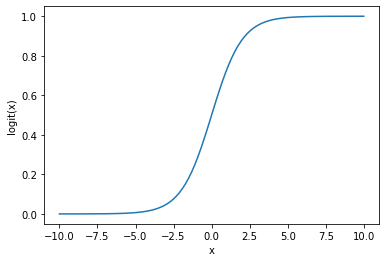

In [36]:
sigmoid = lambda x: 1 / (1 + np.exp(-x)) #La formula anterior la pasamos a código, es lo que ira en el método
x = np.linspace(-10,10,100)
y = sigmoid(x)

#Configuramos la gráfica y la imprimimos por pantalla
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('logit(x)')
plt.show()

In [37]:
sigmoid(X_test)[:,1].min()

0.9999393299669873

In [38]:
sigmoid(X_test)[:,1].max()

1.0